In [1]:
import ktrain
import pandas as pd
import numpy as np

import re, os

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("QTL_text.csv")

# rename category column as label
df.rename(columns={'Category': 'label'}, inplace=True) 

# combine title and abstract into one column called text
df['text'] = df['Title'] + ' ' + df['Abstract']

# only keep label and text columns
df = df[['label', 'text']]

In [ ]:
# nltk.download("stopwords")
# stop_words = set(stopwords.words("english"))
# stemmer = PorterStemmer()

# # Text cleaning function
# def clean_text(text):
#     text = text.lower()  # Convert to lowercase
#     text = re.sub(r"[^\w\s]", "", text)  # Remove special characters
#     text = re.sub(r"\s+", " ", text)  # Remove extra whitespace
#     text = " ".join([stemmer.stem(word) for word in text.split() if word not in stop_words])  # Remove stopwords and stem
#     return text


# df["Cleaned Text"] = df["text"].apply(clean_text)

In [ ]:
# test_ratio = 0.2
# train_ind, test_ind = train_test_split(df.index, test_size=test_ratio, shuffle=True, random_state=3)

# train_df = df.loc[train_ind,:]
# test_df = df.loc[test_ind,:]

In [3]:
classes =  list(set(df.label))

X_train, X_test, y_train, y_test = train_test_split(df.text, df.label, test_size=0.01, random_state=42, stratify=df.label)

# Pre Processing 
trn, val, preproc = ktrain.text.texts_from_array(x_train=X_train.values, y_train=y_train.values,
                                          x_test=X_test.values, y_test=y_test.values,
                                                                   class_names=classes,
                                                                   val_pct=0.1, 
                                                                   max_features=30000, 
                                                                   maxlen=512,
                                                                   preprocess_mode='distilbert',
                                                                   ngram_range=2)

# Model 
model = ktrain.text.text_classifier('distilbert', train_data=trn, preproc=preproc)

preprocessing train...
language: en
train sequence lengths:
	mean : 261
	95percentile : 388
	99percentile : 449


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 247
	95percentile : 392
	99percentile : 514


task: text classification
Is Multi-Label? False
maxlen is 512
done.


[0.54902636 5.59929789]
{0: 0.5490263571990559, 1: 5.599297893681043}
simulating training for different learning rates... this may take a few moments...
Epoch 1/5
5582/5582 [==============================] - 2177s 388ms/step - loss: 0.2964 - accuracy: 0.9127
Epoch 2/5
5582/5582 [==============================] - 2148s 385ms/step - loss: 0.1751 - accuracy: 0.9353
Epoch 3/5
5582/5582 [==============================] - 2104s 377ms/step - loss: 0.3614 - accuracy: 0.9081
Epoch 4/5
5582/5582 [==============================] - 179s 32ms/step - loss: 0.5517 - accuracy: 0.9029


done.
Visually inspect loss plot and select learning rate associated with falling loss


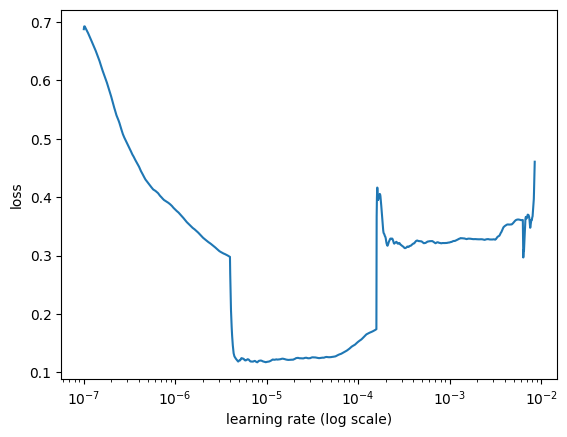



begin training using triangular learning rate policy with max lr of 2e-05...
Epoch 1/10


ResourceExhaustedError:  failed to allocate memory
	 [[node tf_distil_bert_for_sequence_classification_2/distilbert/transformer/layer_._3/output_layer_norm/batchnorm/mul_1
 (defined at c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\keras\layers\normalization\layer_normalization.py:296)
]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_150380]

Errors may have originated from an input operation.
Input Source operations connected to node tf_distil_bert_for_sequence_classification_2/distilbert/transformer/layer_._3/output_layer_norm/batchnorm/mul_1:
In[0] tf_distil_bert_for_sequence_classification_2/distilbert/transformer/layer_._3/add_1 (defined at c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\transformers\models\distilbert\modeling_tf_distilbert.py:276)	
In[1] tf_distil_bert_for_sequence_classification_2/distilbert/transformer/layer_._3/output_layer_norm/batchnorm/mul:

Operation defined at: (most recent call last)
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\runpy.py", line 193, in _run_module_as_main
>>>     "__main__", mod_spec)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\runpy.py", line 85, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
>>>     app.start()
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
>>>     self.io_loop.start()
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\asyncio\base_events.py", line 523, in run_forever
>>>     self._run_once()
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\asyncio\base_events.py", line 1758, in _run_once
>>>     handle._run()
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\asyncio\events.py", line 88, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
>>>     await result
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\ipykernel\ipkernel.py", line 387, in do_execute
>>>     cell_id=cell_id,
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
>>>     return super().run_cell(*args, **kwargs)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\IPython\core\interactiveshell.py", line 2975, in run_cell
>>>     raw_cell, store_history, silent, shell_futures, cell_id
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\IPython\core\interactiveshell.py", line 3029, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\IPython\core\interactiveshell.py", line 3257, in run_cell_async
>>>     interactivity=interactivity, compiler=compiler, result=result)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\IPython\core\interactiveshell.py", line 3472, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\IPython\core\interactiveshell.py", line 3552, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "C:\Users\rohai\AppData\Local\Temp\ipykernel_23232\787508892.py", line 20, in <module>
>>>     learner.autofit(2e-5, 10,class_weight = weights,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\ktrain\core.py", line 1247, in autofit
>>>     steps_per_epoch=steps_per_epoch,
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\ktrain\core.py", line 1661, in fit
>>>     callbacks=kcallbacks,
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\keras\engine\training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\keras\engine\training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\keras\engine\training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\keras\engine\training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\keras\engine\training.py", line 808, in train_step
>>>     y_pred = self(x, training=True)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\transformers\models\distilbert\modeling_tf_distilbert.py", line 800, in call
>>>     distilbert_output = self.distilbert(
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\transformers\models\distilbert\modeling_tf_distilbert.py", line 418, in call
>>>     tfmr_output = self.transformer(
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\transformers\models\distilbert\modeling_tf_distilbert.py", line 314, in call
>>>     for i, layer_module in enumerate(self.layer):
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\transformers\models\distilbert\modeling_tf_distilbert.py", line 318, in call
>>>     layer_outputs = layer_module(hidden_state, attn_mask, head_mask[i], output_attentions, training=training)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\transformers\models\distilbert\modeling_tf_distilbert.py", line 276, in call
>>>     ffn_output = self.output_layer_norm(ffn_output + sa_output)  # (bs, seq_length, dim)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "c:\Users\rohai\anaconda3\envs\dbalancer_env\lib\site-packages\keras\layers\normalization\layer_normalization.py", line 296, in call
>>>     variance_epsilon=self.epsilon)
>>> 

In [ ]:
# Handling class imbalance
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(df.label), y=y_train)
print(class_weights)

weights={}
for index, weight in enumerate(class_weights) :
  weights[index]=weight

print(weights)

# Applying the weights

learner =  ktrain.get_learner(model, train_data=trn, val_data=val,batch_size=2)

# you can find the learning rate
learner.lr_find(show_plot=True,max_epochs=5)

# you can use the learning rate obtained and run for 3 epochs
learner.autofit(2e-5, 10,class_weight = weights,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

In [ ]:
# Test the result (You can use this to compare the results, before and after applying weights)
learner.validate()

# Save your model

learner.save_model('mymodel')
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.save('mymodel')

# Make predictions

predictor.predict("""Insert your text to predict""")